In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plan:
# each node (neuron) has n coordinats == the number of features in the sample space

# pick one sample at random
# find which node is the closest to it
# move it closer to that sample point (using the learning rate)
# update all nodes that are within r of the closest node above using a weighted 1/r formula of some sort

# each epoch the radius is shrinking

### Generate some shaped data

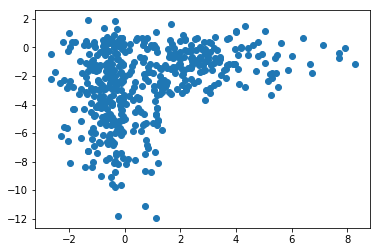

In [47]:
size = 500

x = np.random.normal(0,1,size)
y = np.random.normal(-1,1,size)
x[x>0]*=3
y[(x<1.5) * (y<0)]*=3

plt.scatter(x,y)

In [51]:
n_rows = 5
n_columns = 5
n_dim = 2

In [58]:
nodes = np.random.normal(0,0.1,(n_rows,n_columns,n_dim))

In [69]:
def find_clostest(nodes,sample):
    '''find the closest node to this sample'''
    min_dist = float('inf')
    n_rows,n_cols,_ = nodes.shape
    for i in range(n_rows):
        for j in range(n_cols):
            # distance to current node
            dist = ((nodes[i][j]-sample)**2).sum()
            if (dist<min_dist):
                # update if closer than previously closest
                min_dist = dist
                closest = (i,j)
    return closest

In [68]:
find_clostest(nodes,(0.064,0.11))

(1, 2)

In [72]:
def updated_weights(current,sample,learning_rate):
    '''calculate the current update'''
    delta = sample-current
    return current + delta * learning_rate